# 부동산 데이터 탐색
* 토지

In [84]:
'''
1. 데이터 불러오기
2. 데이터 타입 정리
3. Na 값 정리
#지도학습 1) 가격맞추기 2)분류하기 (y=use)
#비지도학습 1) 위치 좌표 나타내기 2) 군집화 
'''

'\n1. 데이터 불러오기\n2. 데이터 타입 정리\n3. Na 값 정리\n#지도학습 1) 가격맞추기 2)분류하기 (y=use)\n#비지도학습 1) 위치 좌표 나타내기 2) 군집화 \n'

In [44]:
import numpy as np
import pandas as pd
import os
import glob
import plotly

In [45]:
path="Dataset/LAND"
allFiles = glob.glob(os.path.join(path,"*.csv"))

In [46]:
allFiles

['Dataset/LAND\\토지(매매)-실거래가-201809.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201512.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201601.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201602.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201603.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201604.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201605.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201606.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201607.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201608.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201609.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201610.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201611.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201612.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201701.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201702.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201703.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201704.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201705.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201706.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201707.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201708.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201709.csv',
 'Dataset/LAND\\토지(매매)_실거래가-201710.csv',
 'Dataset/LAND\\

In [47]:
np_array_list = []
for file_ in allFiles:
    df=pd.read_csv(file_,index_col=None,skiprows=14,engine='python')
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
dataset = pd.DataFrame(comb_np_array)
dataset.columns = df.columns

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [48]:
dataset.columns

Index(['시군구', '번지', '지목', '용도지역', '도로조건', '계약년월', '계약일', '계약면적(㎡)', '거래금액(만원)',
       '지분구분'],
      dtype='object')

In [49]:
dataset.columns = ["add_1", "add_2", "land_category", "use_district", 
                   "road_condition", "year_month", "day", "land_area", 
                   "price", "shares"]

In [50]:
dataset.shape #관측치:1,957,190, 항목: 10

(1957190, 10)

In [51]:
dataset.head()

,add_1,add_2,land_category,use_district,road_condition,year_month,day,land_area,price,shares
0,전라남도 순천시 주암면 오산리,6**,대,계획관리지역,8m미만,201809,1~10,452,"1,000",
1,전라남도 고흥군 영남면 금사리,6*,임야,농림지역,-,201809,1~10,668,"1,000",
2,경기도 화성시 서신면 사곳리,5*,임야,계획관리지역,8m미만,201809,1~10,185,"1,000",
3,경상남도 하동군 북천면 사평리,4**,답,농림지역,8m미만,201809,1~10,456,"1,000",
4,경기도 양평군 서종면 문호리,4*,도로,계획관리지역,-,201809,1~10,32,"1,000",지분


In [52]:
dataset.tail()

,add_1,add_2,land_category,use_district,road_condition,year_month,day,land_area,price,shares
1957185,경기도 하남시 상산곡동,산3**,임야,개발제한구역,-,201808,21~31,93,986,지분
1957186,경상북도 상주시 외남면 흔평리,9**,답,생산관리지역,-,201808,21~31,1445,990,
1957187,세종특별자치시 전의면 유천리,산9*,임야,농림지역,-,201808,21~31,330,990,지분
1957188,전라남도 장성군 삼계면 부성리,7**,잡종지,생산관리지역,-,201808,21~31,464,995,
1957189,경상북도 의성군 신평면 덕봉리,3*,답,농림지역,8m미만,201808,21~31,1098,998,


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957190 entries, 0 to 1957189
Data columns (total 10 columns):
add_1             object
add_2             object
land_category     object
use_district      object
road_condition    object
year_month        object
day               object
land_area         object
price             object
shares            object
dtypes: object(10)
memory usage: 149.3+ MB


In [54]:
#Edit price datatype
dataset['price']=dataset['price'].str.replace(",","").astype('int64')
print(dataset['price'].describe())

count    1.957190e+06
mean     1.207642e+04
std      1.640032e+05
min      1.000000e+00
25%      9.000000e+02
50%      3.000000e+03
75%      9.000000e+03
max      1.055200e+08
Name: price, dtype: float64


In [55]:
#Edit land_area datatype
dataset['land_area']=dataset['land_area'].astype('int64')
print(dataset['land_area'].describe())

count    1.957190e+06
mean     1.667966e+03
std      1.109553e+04
min      1.000000e+00
25%      1.140000e+02
50%      4.330000e+02
75%      1.279000e+03
max      4.108269e+06
Name: land_area, dtype: float64


In [56]:
#Edit day datatpye
dataset['day'].value_counts()
#644181+629000+417212+214148+34830+17819=1957190

11~20    644181
1~10     629000
21~31    417212
21~30    214148
21~28     34830
21~29     17819
Name: day, dtype: int64

In [57]:
''' 
Change type 'contractD' as categorical type --> 월별로 범위가 달라서 categorical 형태를 무리
--> '1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3로 형태 바꾸기
'''
d = {'1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3}
dataset['day'] = dataset['day'].replace(d)

In [58]:
print(dataset['day'].value_counts()) 
#684009+644181+629000=1957190
dataset['day']=dataset['day']
print(dataset['day'].describe())

3    684009
2    644181
1    629000
Name: day, dtype: int64
count    1.957190e+06
mean     2.028106e+00
std      8.185809e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: day, dtype: float64


In [59]:
#Edit Year_month type
dataset['year_month']=dataset['year_month'].astype('int64')
print([dataset['year_month'].describe()])

[count    1.957190e+06
mean     2.016890e+05
std      8.298825e+01
min      2.015120e+05
25%      2.016080e+05
50%      2.017040e+05
75%      2.017120e+05
max      2.018090e+05
Name: year_month, dtype: float64]


In [60]:
#Edit Road_condition type

c = {'8m미만':1,'12m미만':2,'25m미만':3,'25m이상':4}
dataset['road_condition'] = dataset['road_condition'].replace(c)

dataset['road_condition'].astype('category').value_counts()


1    892469
-    840523
2    160732
3     43021
4     20434
Name: road_condition, dtype: int64

In [65]:
#land category
dataset['land_category'].astype('category').value_counts()

답        555504
전        480805
임야       460280
대        230375
도로       119790
잡종지       27474
과수원       25102
공장용지      11151
목장용지       8241
묘지         7157
하천         5645
구거         5431
유지         3455
염전         3341
주차장        3277
창고용지       2237
공원         1433
철도용지       1075
학교용지        993
양어장         873
제방          858
종교용지        708
체육용지        659
주유소용지       595
유원지         466
수도용지        239
사적지          12
광천지          12
Name: land_category, dtype: int64

In [61]:
#Use district
dataset['use_district'].astype('category').value_counts()

계획관리지역       559736
농림지역         335253
자연녹지지역       239594
생산관리지역       172762
보전관리지역       158029
제2종일반주거지역    111951
제1종일반주거지역     99418
개발제한구역        77291
생산녹지지역        48267
일반상업지역        27852
보전녹지지역        26026
자연환경보전        23470
제3종일반주거지역     18723
용도미지정         13561
준주거지역         12884
일반공업지역        11772
준공업지역          7079
제1종전용주거지역      4866
제2종전용주거지역      2607
관리지역           1796
중심상업지역         1429
근린상업지역         1319
전용공업지역          430
기타              388
일반주거지역          316
유통상업지역          262
전용주거지역           95
Name: use_district, dtype: int64

In [62]:
#Shares
dataset['shares'].astype('category').value_counts()

      1425506
지분     531684
Name: shares, dtype: int64

In [63]:
#shares ...?
dataset.loc[dataset['shares'].isnull(),'shares'] = 0.0
dataset['shares'].astype('category').value_counts()

      1425506
지분     531684
Name: shares, dtype: int64

In [64]:
#After Editing Data Type
print("After Data type : \n{}".format(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957190 entries, 0 to 1957189
Data columns (total 10 columns):
add_1             object
add_2             object
land_category     object
use_district      object
road_condition    object
year_month        int64
day               int64
land_area         int64
price             int64
shares            object
dtypes: int64(4), object(6)
memory usage: 149.3+ MB
After Data type : 
None


In [83]:
dataset.describe()

,year_month,day,land_area,price
count,1.957155e+06,1.957155e+06,1.957155e+06,1.957155e+06
mean,2.016890e+05,2.028108e+00,1.667984e+03,1.207549e+04
std,8.298836e+01,8.185804e-01,1.109562e+04,1.640040e+05
min,2.015120e+05,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.016080e+05,1.000000e+00,1.140000e+02,9.000000e+02
50%,2.017040e+05,2.000000e+00,4.330000e+02,3.000000e+03
75%,2.017120e+05,3.000000e+00,1.279000e+03,9.000000e+03
max,2.018090e+05,3.000000e+00,4.108269e+06,1.055200e+08


In [68]:
#NaN value
dataset.isnull().sum().to_frame()

,0
add_1,0
add_2,8
land_category,2
use_district,14
road_condition,11
year_month,0
day,0
land_area,0
price,0
shares,0


In [69]:
#  NaN ratio  -> use option 1 ...? 8+2+14+11=35...

dataset = dataset.dropna(axis=0)
dataset.isnull().sum().to_frame()

,0
add_1,0
add_2,0
land_category,0
use_district,0
road_condition,0
year_month,0
day,0
land_area,0
price,0
shares,0


C:\Anaconda3\envs\public_data_eda\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0



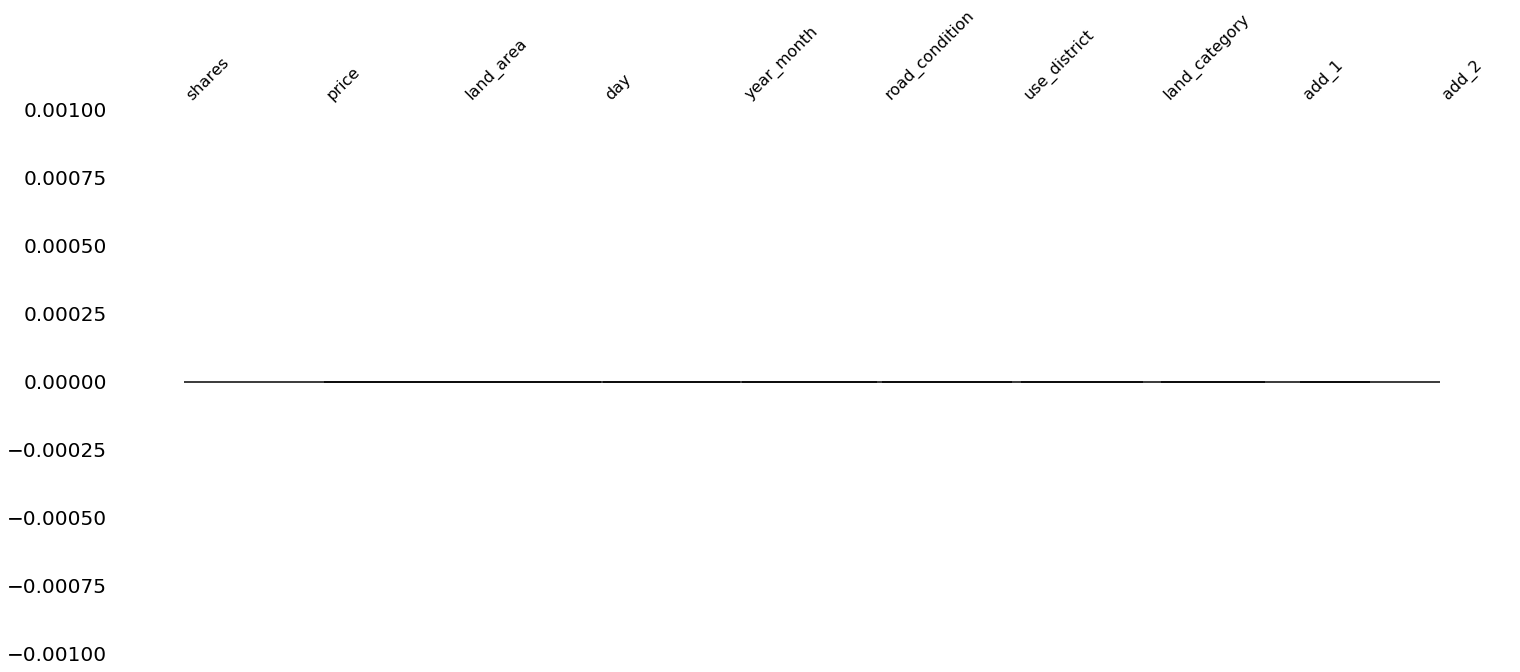

In [72]:
#!pip install missingno
import missingno 
import matplotlib
%matplotlib inline

missingno.dendrogram(dataset)

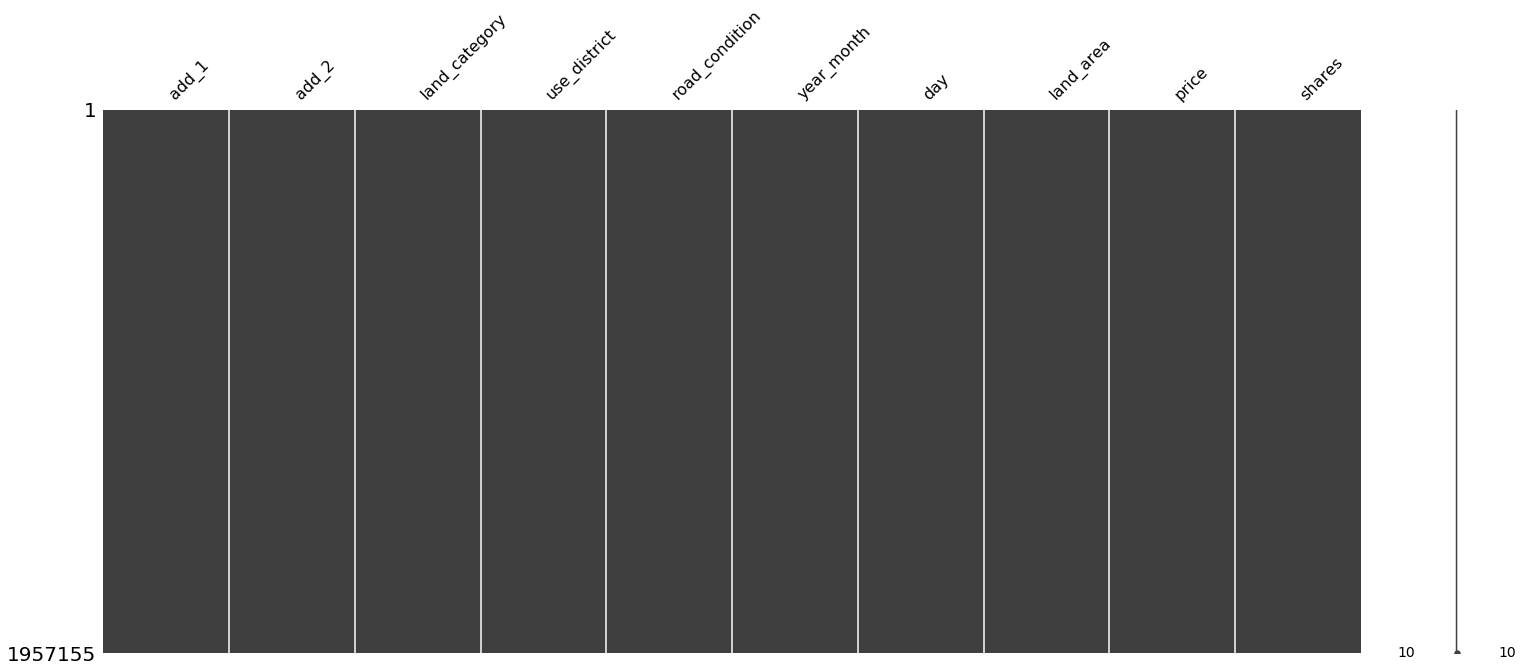

In [71]:


missingno.matrix(dataset)

C:\Anaconda3\envs\public_data_eda\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0



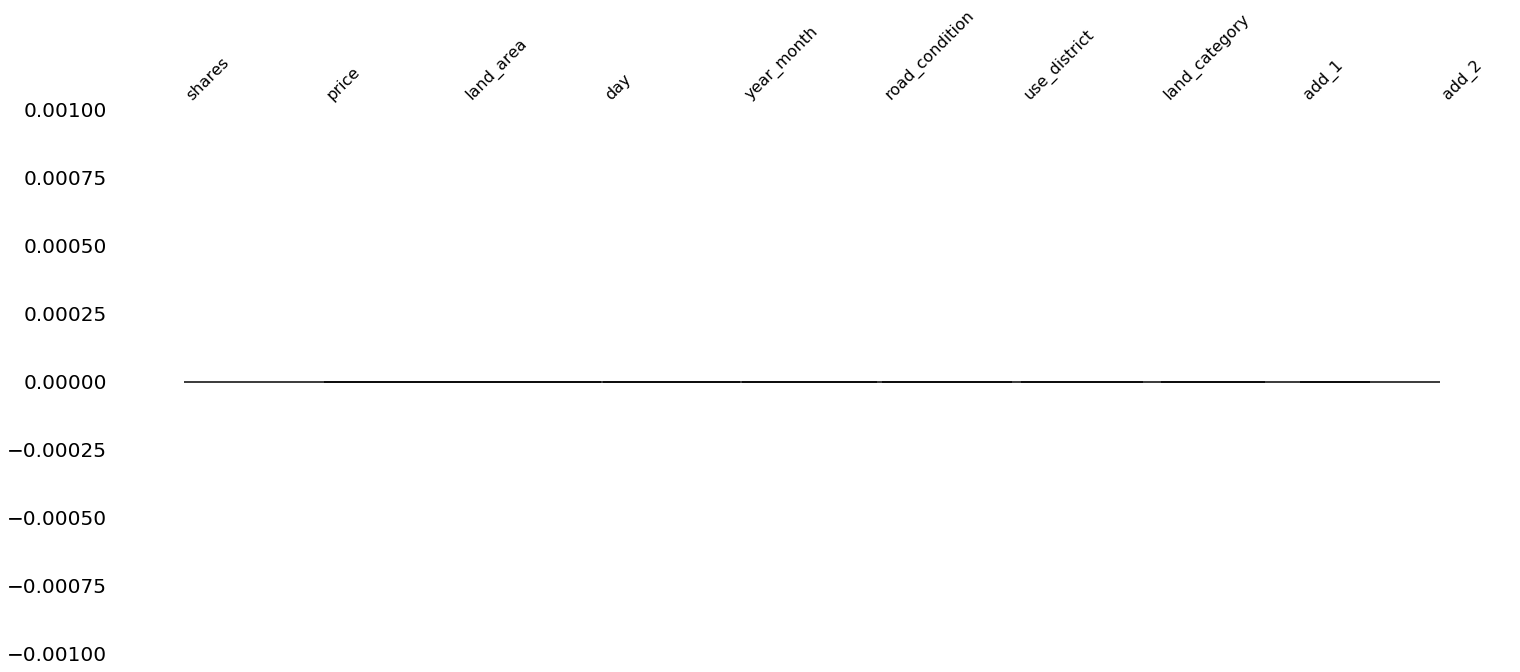

In [74]:
missingno.dendrogram(dataset)

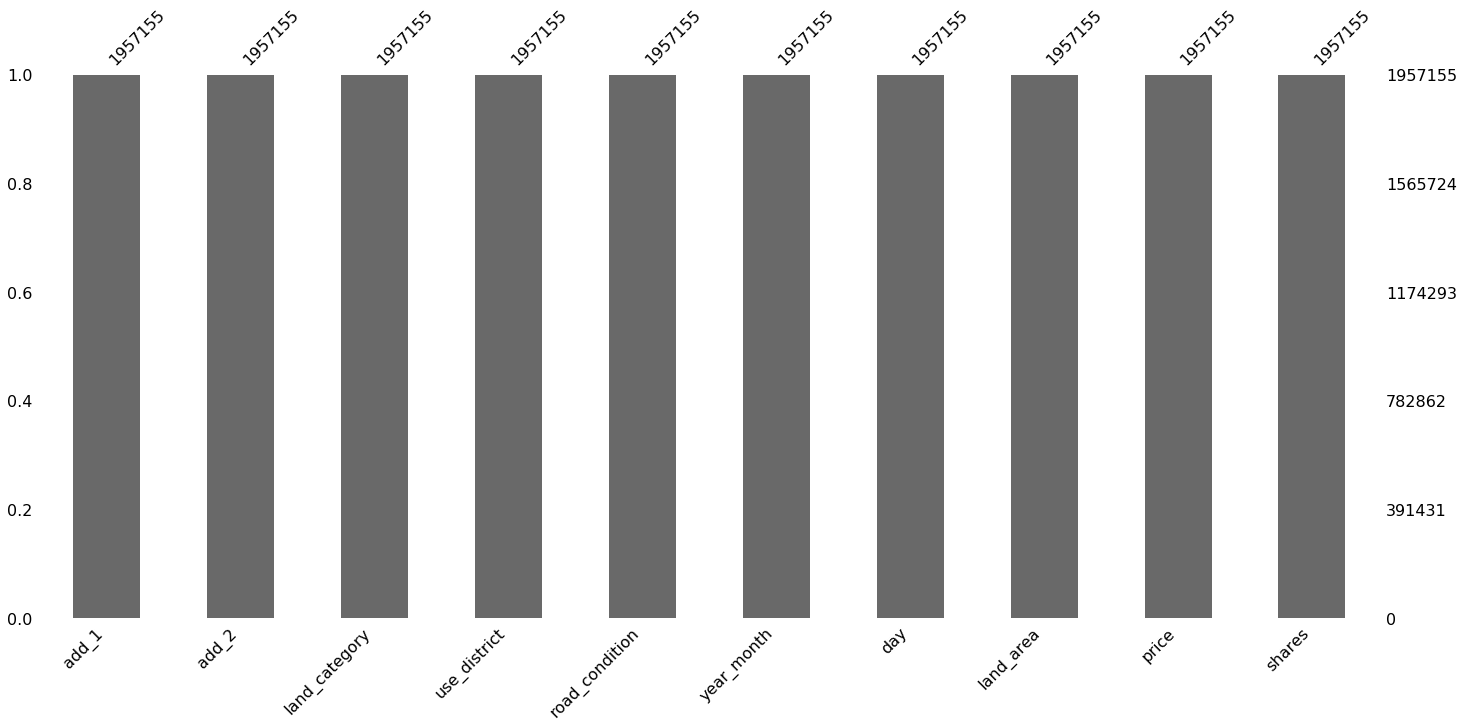

In [75]:
missingno.bar(dataset)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#Size of Graph
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [79]:
plt.show()

KeyError: "['계획관리지역' '농림지역' '계획관리지역' ... '농림지역' '생산관리지역' '농림지역'] not in index"

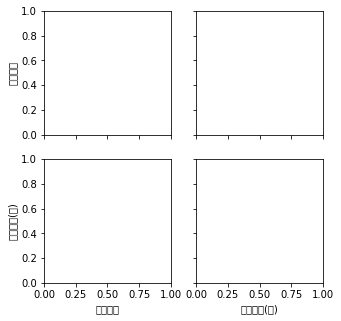

In [82]:
sns.pairplot(df, hue=dataset['use_district']);
plt.show()